# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [55]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Your code here
data= pd.read_csv("PS_20174392719_1491204439457_log.csv")
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [23]:
data_sample = data.sample(n=100000, random_state=42)
data_sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
5156943,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
5189870,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
1551677,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


In [24]:
data_sample.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [25]:
data["type"].unique() #need to change it to numeric with dummies

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [26]:
data_dummies = pd.get_dummies(data_sample, columns=['type'], prefix='type',dtype=int)
data_dummies

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,1,0,0,0,0
264914,15,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,0,0,0,1,0
85647,10,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,1,0,0,0,0
5899326,403,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,0,0,0,0,1
2544263,206,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0,1,0,0,0,0
5156943,357,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0,1,0,0,0,0
5189870,369,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0,0,1,0,0,0
1551677,154,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0,1,0,0,0,0


In [27]:
#drop nameOrig and nameDest
data_dummies = data_dummies.drop(["nameOrig","nameDest"], axis=1)
data_dummies

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,20866.00,351084.42,452419.57,122201.15,0,0,1,0,0,0,0
264914,15,11647.08,30370.00,18722.92,0.00,0.00,0,0,0,0,0,1,0
85647,10,152264.21,106589.00,258853.21,201303.01,49038.80,0,0,1,0,0,0,0
5899326,403,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0,0,0,0,0,1
2544263,206,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,371042.71,1699365.85,2070408.56,4301572.86,3930530.15,0,0,1,0,0,0,0
5156943,357,19494.57,1921089.11,1940583.68,75635.52,56140.95,0,0,1,0,0,0,0
5189870,369,141519.24,0.00,0.00,12853274.23,12994793.47,0,0,0,1,0,0,0
1551677,154,635412.68,58610.00,694022.68,0.00,0.00,0,0,1,0,0,0,0


In [28]:
data_dummies.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,243.709070,1.805811e+05,8.366804e+05,8.582234e+05,1.104193e+06,1.230055e+06,0.001410,0.000010,0.221410,0.35334,0.006120,0.335640,0.083490
std,142.518613,5.586699e+05,2.901104e+06,2.936799e+06,3.223011e+06,3.475326e+06,0.037524,0.003162,0.415198,0.47801,0.077991,0.472216,0.276623
min,1.000000,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,156.000000,1.350821e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,240.000000,7.603086e+04,1.393850e+04,0.000000e+00,1.387482e+05,2.185786e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,335.000000,2.091130e+05,1.070771e+05,1.464169e+05,9.605963e+05,1.126011e+06,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000
max,736.000000,3.697390e+07,3.359321e+07,3.388709e+07,2.362896e+08,2.724047e+08,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


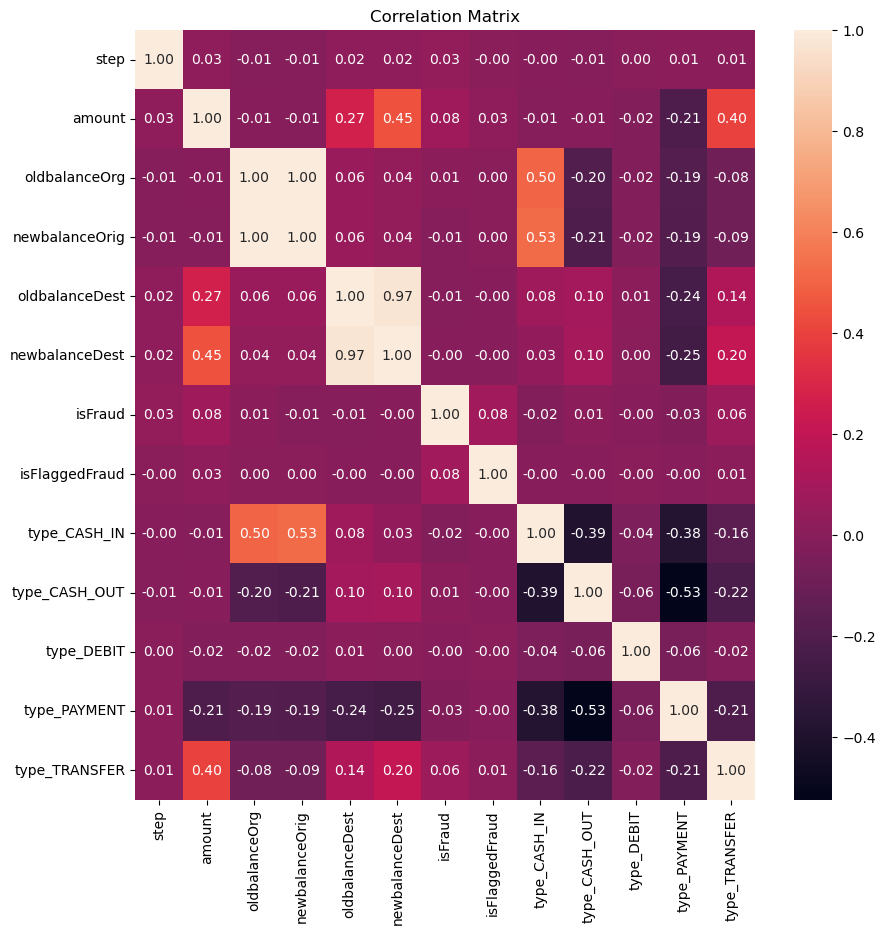

In [63]:
correlation_matrix = data_dummies.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### What is the distribution of the outcome? 

C:\Users\maria\AppData\Local\Temp\ipykernel_10216\1652825981.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_dummies['isFraud']).plot(kind = 'bar')


<Axes: xlabel='isFraud'>

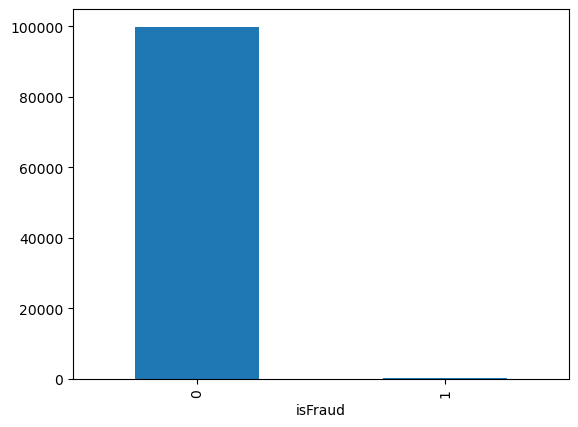

In [35]:
# Your response here
pd.value_counts(data_dummies['isFraud']).plot(kind = 'bar')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [38]:
# Your code here
#I already cleaned before, where i used dummies for Type and dropeped 'nameOrig','nameDest'.

### Run a logisitc regression classifier and evaluate its accuracy.

In [40]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features = data_dummies.drop(labels='isFraud', axis=1)
target = data_dummies['isFraud']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.2)

fraud_model= LogisticRegression()

In [41]:
fraud_model.fit(X_train,y_train)

LogisticRegression()

In [42]:
fraud_model.score(X_test,y_test)

0.9984

In [47]:
pred = fraud_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[19953,    16],
       [   16,    15]], dtype=int64)

In [48]:
fraud_model.score(X_train,y_train)

0.99865

### Now pick a model of your choice and evaluate its accuracy.

In [57]:
# Your code here
knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19968,     1],
       [   10,    21]], dtype=int64)

In [60]:
accuracy_score(y_test, y_pred)

0.99945

### Which model worked better and how do you know?

In [61]:
# Your response here
#The knn has more accuracy score(0.99865 > 0.99945).
#array([[19953,    16],
#      [   16,    15]] from Linear Rgression VS 
#array([[19968,     1],
#      [   10,    21]] from knn
#If capturing as many positive fraud as possible, Linear Regression might be considered better, although it has a lower accuracy.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.